In [1]:

import pandas as pd     
import numpy as np      
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense,  Activation, Conv2D, MaxPool2D,ConvLSTM2D, MaxPooling2D,LSTM,Conv1D,MaxPool1D,GlobalAveragePooling1D,TimeDistributed,MaxPooling1D
from keras.layers import Flatten, Dropout, BatchNormalization, Reshape
from keras.utils.vis_utils import plot_model

import os
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
import keras




In [2]:
MicroC = pd.read_csv("FinalIV_Cumulative.csv")
MicroC.info()
MicroC.head(4)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   StudyNumber                  16800 non-null  int64  
 1   Date                         16800 non-null  object 
 2   ORG.1                        16800 non-null  object 
 3   Pseudomonas                  16800 non-null  int64  
 4   Specimen                     16800 non-null  object 
 5   Ciprofloxacin                16800 non-null  float64
 6   Ceftazidime                  16800 non-null  float64
 7   Meropenem                    16800 non-null  float64
 8   Pip/Tazo                     16800 non-null  float64
 9   Tob                          16800 non-null  float64
 10  MDR                          16800 non-null  float64
 11  Ceftazidime_Cumul2Years      16800 non-null  float64
 12  Tobramycin_Cumul2Years       16800 non-null  float64
 13  Meropenem_Cumul2

,StudyNumber,Date,ORG.1,Pseudomonas,Specimen,Ciprofloxacin,Ceftazidime,Meropenem,Pip/Tazo,Tob,...,Ceftazidime_Cumul6Months,Tobramycin_Cumul6Months,Meropenem_Cumul6Months,Colistimethate_Cumul6Months,Fosfomycin_Cumul6Months,Aztreonam_Cumul6Months,Tazocin_Cumul6Months,Co-trimoxazole_Cumul6Months,Temocillin_Cumul6Months,Teicoplanin_Cumul6Months
0,205,2012-11-30,PYOMO,1,"C,22.0443043.FA",1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,205,2012-11-30,PYOS,1,"C,22.0443043.FA",1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,205,2012-11-30,STAU,0,"C,22.0443043.FA",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,41,2013-01-01,Pseudomona,1,"C,13.0140020.BA",1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
from sklearn.preprocessing import LabelEncoder

MicroC['Date']= pd.to_datetime(MicroC['Date'])
MicroC = MicroC.sort_values('Date')
MicroC = MicroC.drop([ 'ORG.1', 'Pseudomonas', 'Date'], axis=1)




In [4]:
# Convert categorical features to numeric
label_encoder = LabelEncoder()
MicroC['Specimen'] = label_encoder.fit_transform(MicroC['Specimen'])

In [5]:
x= MicroC.drop(columns='Meropenem')
y = MicroC['Meropenem']


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=42)





In [7]:
MicroC.head(5)


,StudyNumber,Specimen,Ciprofloxacin,Ceftazidime,Meropenem,Pip/Tazo,Tob,MDR,Ceftazidime_Cumul2Years,Tobramycin_Cumul2Years,...,Ceftazidime_Cumul6Months,Tobramycin_Cumul6Months,Meropenem_Cumul6Months,Colistimethate_Cumul6Months,Fosfomycin_Cumul6Months,Aztreonam_Cumul6Months,Tazocin_Cumul6Months,Co-trimoxazole_Cumul6Months,Temocillin_Cumul6Months,Teicoplanin_Cumul6Months
0,205,8320,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,205,8320,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,205,8320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,41,1,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,41,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Reshape the input data for LSTM
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))


In [9]:
# Define the LSTM model
#model = Sequential()
#model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
#model.add(Dropout(0.5))
#model.add(Dense(2, activation='softmax'))  # Update the number of units to 2

# Compile and train the model
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


In [10]:
# reset tensorflow session
from tensorflow.keras import backend as K
K.clear_session()

In [11]:
# Normalize input features
#scaler = MinMaxScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Reshape the input data
#X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
#X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Define the LSTM model
#model = Sequential()
#model.add(Conv1D(filters=80, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
#model.add(MaxPooling1D(pool_size=2))
#model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(64))
#model.add(Dropout(0.2))
#model.add(Dense(100, activation='relu'))
#model.add(Dense(2, activation='softmax'))

# Compile and train the model
#model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])


In [12]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D
from sklearn.preprocessing import MinMaxScaler

# Normalize input features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the input data
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Define the LSTM model
model = Sequential()
model.add(Conv1D(filters=80, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

# Print model summary
print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 25, 80)            320       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 12, 80)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 64)            15424     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 5, 64)            0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dropout (Dropout)           (None, 64)                0

In [13]:
X_test_reshaped.shape


(3360, 27, 1)

In [14]:
X_train_reshaped.shape

(13440, 27, 1)

In [15]:
y_test.shape

(3360,)

In [16]:
y_train.shape

(13440,)

In [17]:
#model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32)


callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='accuracy', patience=1)
]
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_reshaped,
                    y_train,
                    batch_size= 64, 
                    validation_split=0.2,
                    epochs=20
                   )


Epoch 1/20
168/168 [==============================] - 10s 33ms/step - loss: 0.3682 - accuracy: 0.8650 - val_loss: 0.3049 - val_accuracy: 0.8973
Epoch 2/20
168/168 [==============================] - 4s 25ms/step - loss: 0.2972 - accuracy: 0.8983 - val_loss: 0.2843 - val_accuracy: 0.9044
Epoch 3/20
168/168 [==============================] - 6s 38ms/step - loss: 0.2837 - accuracy: 0.9005 - val_loss: 0.2805 - val_accuracy: 0.8999
Epoch 4/20
168/168 [==============================] - 7s 40ms/step - loss: 0.2788 - accuracy: 0.9014 - val_loss: 0.3156 - val_accuracy: 0.8910
Epoch 5/20
168/168 [==============================] - 6s 33ms/step - loss: 0.2760 - accuracy: 0.9022 - val_loss: 0.2787 - val_accuracy: 0.9010
Epoch 6/20
168/168 [==============================] - 5s 32ms/step - loss: 0.2725 - accuracy: 0.9039 - val_loss: 0.2729 - val_accuracy: 0.9014
Epoch 7/20
168/168 [==============================] - 6s 37ms/step - loss: 0.2703 - accuracy: 0.9023 - val_loss: 0.2774 - val_accuracy: 0.902

In [24]:
# Make predictions on test data
predictions = model.predict(X_test_reshaped)
predicted_labels = (predictions > 0.29366508).astype(int)

# Convert Pandas Series to NumPy arrays and flatten them
predicted_labels = predicted_labels.flatten()
true_labels = y_test.values.flatten()


# Print predicted and true labels
print("Predicted Labels:", predicted_labels)
print("True Labels:", true_labels)


105/105 [==============================] - 1s 8ms/step
Predicted Labels: [0 0 0 ... 1 0 0]
True Labels: [1. 0. 0. ... 1. 0. 0.]


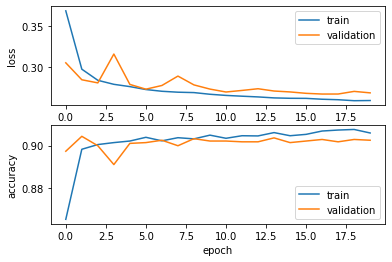

In [25]:
def plot_history(history):
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(history.history['loss'])
    
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'])
    plt.subplot(2,1,2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'])
    plt.savefig('EpochMeropenemoutput.png', dpi=400)

    return;

plot_history(history)

In [26]:
from sklearn.metrics import accuracy_score

# Convert Pandas Series to NumPy arrays and flatten them
predicted_labels = predicted_labels.flatten()
true_labels = y_test.values.flatten()

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Print accuracy
print("Accuracy on Test Data:", accuracy)


Accuracy on Test Data: 0.8946428571428572


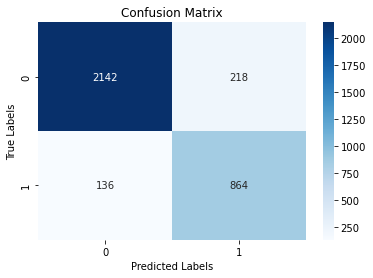

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('confMatMeropenemoutput.png', dpi=400)

plt.show()


Sensitivity (True Positive Rate): 0.864
Specificity (True Negative Rate): 0.908
ROC AUC: 0.941
Precision: 0.799
Recall: 0.864
F1-score: 0.830
Sensitivity (True Positive Rate): 0.864
Specificity (True Negative Rate): 0.908


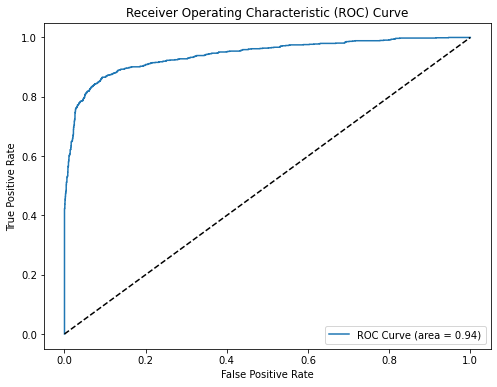

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score

fpr, tpr, _ = roc_curve(true_labels, predictions)

roc_auc = roc_auc_score(true_labels, predictions)

conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Compute precision, recall, and F1-score
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)
# Get the elements of the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Compute sensitivity (True Positive Rate)
sensitivity = tp / (tp + fn)

# Compute specificity (True Negative Rate)
specificity = tn / (tn + fp)

print("Sensitivity (True Positive Rate): {:.3f}".format(sensitivity))
print("Specificity (True Negative Rate): {:.3f}".format(specificity))

# Print evaluation metrics
print("ROC AUC: {:.3f}".format(roc_auc))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1-score: {:.3f}".format(f1))
print("Sensitivity (True Positive Rate): {:.3f}".format(sensitivity))
print("Specificity (True Negative Rate): {:.3f}".format(specificity))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


105/105 [==============================] - 1s 11ms/step


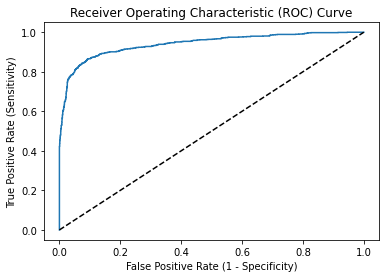

Best Threshold (Youden's J Statistic): 0.29366508


In [23]:
from sklearn.metrics import roc_curve
# Make predictions on test data (probabilities for positive class)
probabilities_testTresh = model.predict(X_test_reshaped)

# Calculate FPR and TPR for different cut-off points
fpr, tpr, thresholds = roc_curve(true_labels, probabilities_testTresh)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

# Calculate Youden's J Statistic for each threshold
youden_j = tpr - fpr

# Find the index of the threshold that maximizes Youden's J Statistic
best_threshold_index = np.argmax(youden_j)

# Get the best threshold value
best_threshold = thresholds[best_threshold_index]

print("Best Threshold (Youden's J Statistic):", best_threshold)
